# NBA Team Clustering Analysis Project

Within the NBA, there are many different types of team play styles. For instance, some teams focus on three point shooting, while others emphasize defense and rebounding. The goal of this project is to use dimensionality reduction and K-means clustering analysis to identify distinct clusters of different team play styles throughout the NBA. Furthermore, by comparing the different play styles with total wins within the league, it is possible to see whether there is a dominant team play style or set of styles in the NBA. Finally, by performing this analysis on historical data dating back to the 1976 season (first season after the merger between the ABA and NBA), it is possible to identify trends in how the play style of the league as a whole has shifted over time.

Creators: Karthik Guruvayurappan and Akshay Gopalkrishnan

Data Source: basketball-reference.com

In [61]:
# import necessary packages for data analysis
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model


### Formatting Datasets from basketball-reference.com into Dictionary

This cell formats all of the datasets collected from basketball-reference.com into a dictionary format. To access the datasets, the keys are in the format: 'Year Type'. The datasets are read in as pandas DataFrames

Available Years Include: 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2019

Available Dataset Types Include: Team, Opponent, Misc, Standings

A sample statement to access a dataset would be: team_2019 = datasets['2019 Team']

In [62]:
# create a list to hold all dataset names
dataset_list = []

# adds all CSV files from the datasets folder to a list
for dataset in os.listdir('./Datasets'):
    if (dataset.endswith('.csv')):
        dataset_list.append(dataset)

# adds all datasets to a dictionary with the key being 'Year Type' 
datasets = {}
for dataset in dataset_list:
    data_file = pd.read_csv('./Datasets/' + dataset)
    dataset_name = dataset[dataset.index('- ') + 1 : dataset.index('.')].strip()
    datasets[dataset_name] = data_file

### Exploratory Data Analysis



In [63]:
team_2019 = datasets['2019 Team']
team_2019.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Milwaukee Bucks*,82,241.2,43.4,91.1,0.476,13.5,38.2,0.353,...,0.773,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1
1,2.0,Golden State Warriors*,82,241.5,44.0,89.8,0.491,13.3,34.4,0.385,...,0.801,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7
2,3.0,New Orleans Pelicans,82,240.9,43.7,92.2,0.473,10.3,29.9,0.344,...,0.761,11.1,36.2,47.3,27.0,7.4,5.4,14.8,21.1,115.4
3,4.0,Philadelphia 76ers*,82,241.5,41.5,88.2,0.471,10.8,30.2,0.359,...,0.771,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2
4,5.0,Los Angeles Clippers*,82,241.8,41.3,87.5,0.471,10.0,25.8,0.388,...,0.792,9.7,35.8,45.5,24.0,6.8,4.7,14.5,23.3,115.1


Regression Coefficient: 0.9068932865452393
Correlation Coefficient: 0.7186039777843883


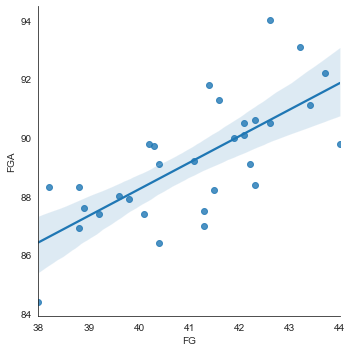

In [64]:
# plot FG against FGA for 2019 Team Data
fg_x = team_2019['FG'].to_numpy().reshape(-1, 1)
fga_y = team_2019['FGA'].to_numpy()
lin_reg = LinearRegression().fit(fg_x, fga_y)
sns.lmplot(x='FG', y='FGA', data=team_2019)
corr_coeff = pearsonr(team_2019['FG'].to_numpy(), fga_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 0.00651197950235929
Correlation Coefficient: 0.8227110723565924


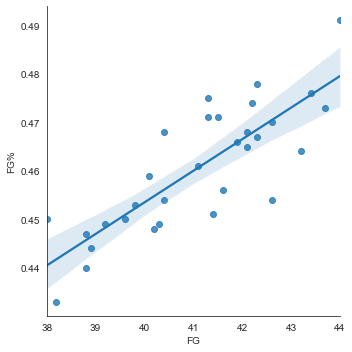

In [65]:
# plot FG against FG% for 2019 Team Data
fg_x = team_2019['FG'].to_numpy().reshape(-1, 1)
fgp_y = team_2019['FG%'].to_numpy()
lin_reg = LinearRegression().fit(fg_x, fgp_y)
sns.lmplot(x='FG', y='FG%', data=team_2019)
corr_coeff = pearsonr(team_2019['FG'].to_numpy(), fgp_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 0.0012359674059123007
Correlation Coefficient: 0.19706427751947828


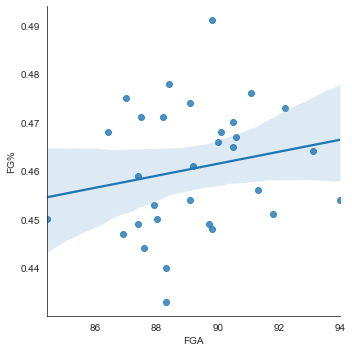

In [66]:
# plot FGA against FG% for 2019 Team Data
fga_x = team_2019['FGA'].to_numpy().reshape(-1, 1)
fgp_y = team_2019['FG%'].to_numpy()
lin_reg = LinearRegression().fit(fga_x, fgp_y)
sns.lmplot(x='FGA', y='FG%', data=team_2019)
corr_coeff = pearsonr(team_2019['FGA'].to_numpy(), fgp_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 2.7204858228416833
Correlation Coefficient: 0.9546820957860316


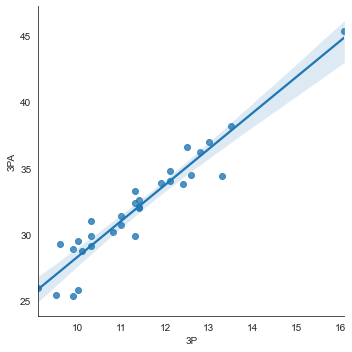

In [67]:
# plot 3P against 3PA for 2019 Team Data
threep_x = team_2019['3P'].to_numpy().reshape(-1, 1)
threepa_y = team_2019['3PA'].to_numpy()
lin_reg = LinearRegression().fit(threep_x, threepa_y)
sns.lmplot(x='3P', y='3PA', data=team_2019)
corr_coeff = pearsonr(team_2019['3P'].to_numpy(), threepa_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 0.0007309318929900512
Correlation Coefficient: 0.07199849961839559


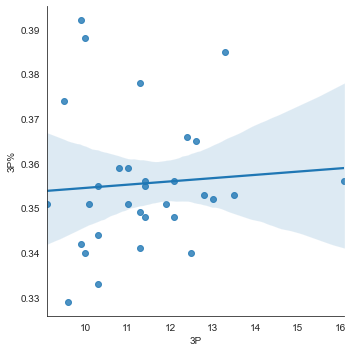

In [68]:
# plot 3P against 3P% for 2019 Team Data
threep_x = team_2019['3P'].to_numpy().reshape(-1, 1)
threepp_y = team_2019['3P%'].to_numpy()
lin_reg = LinearRegression().fit(threep_x, threepp_y)
sns.lmplot(x='3P', y='3P%', data=team_2019)
corr_coeff = pearsonr(team_2019['3P'].to_numpy(), threepp_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: -0.0008018528074170016
Correlation Coefficient: -0.22507583888769397


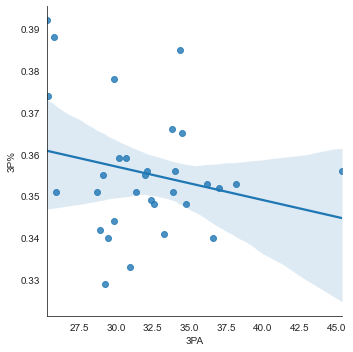

In [69]:
# plot 3PA against 3P% for 2019 Team Data
threepa_x = team_2019['3PA'].to_numpy().reshape(-1, 1)
threepp_y = team_2019['3P%'].to_numpy()
lin_reg = LinearRegression().fit(threepa_x, threepp_y)
sns.lmplot(x='3PA', y='3P%', data=team_2019)
corr_coeff = pearsonr(team_2019['3PA'].to_numpy(), threepp_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 1.1618018926466025
Correlation Coefficient: 0.9056437705724992


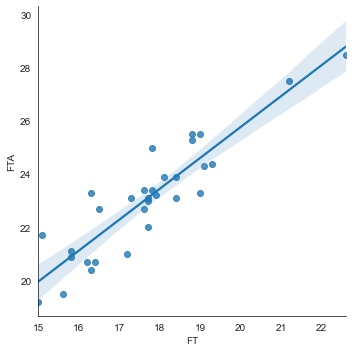

In [70]:
# plot FT against FTA for 2019 Team Data
ft_x = team_2019['FT'].to_numpy().reshape(-1, 1)
fta_y = team_2019['FTA'].to_numpy()
lin_reg = LinearRegression().fit(ft_x, fta_y)
sns.lmplot(x='FT', y='FTA', data=team_2019)
corr_coeff = pearsonr(team_2019['FT'].to_numpy(), fta_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 0.004022339435308713
Correlation Coefficient: 0.21157532321076095


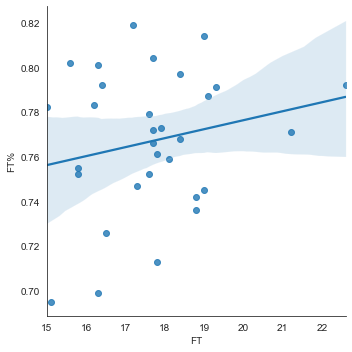

In [71]:
# plot FT against FT% for 2019 Team Data
ft_x = team_2019['FT'].to_numpy().reshape(-1, 1)
ftp_y = team_2019['FT%'].to_numpy()
lin_reg = LinearRegression().fit(ft_x, ftp_y)
sns.lmplot(x='FT', y='FT%', data=team_2019)
corr_coeff = pearsonr(team_2019['FT'].to_numpy(), ftp_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: -0.0032791768593015778
Correlation Coefficient: -0.22127166925601113


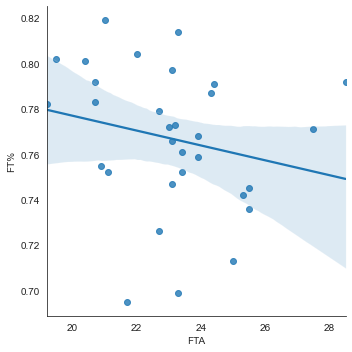

In [72]:
# plot FTA against FT% for 2019 Team Data
fta_x = team_2019['FTA'].to_numpy().reshape(-1, 1)
ftp_y = team_2019['FT%'].to_numpy()
lin_reg = LinearRegression().fit(fta_x, ftp_y)
sns.lmplot(x='FTA', y='FT%', data=team_2019)
corr_coeff = pearsonr(team_2019['FTA'].to_numpy(), ftp_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 106.55227596017066
Correlation Coefficient: 0.6487666347472236


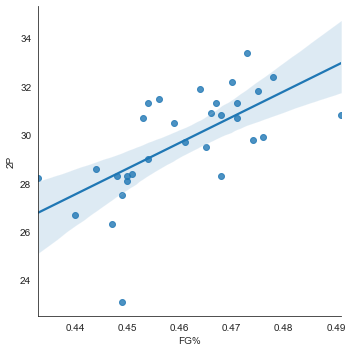

In [73]:
# plot FG% against 2P for 2019 Team Data
fgp_x = team_2019['FG%'].to_numpy().reshape(-1, 1)
tp_y = team_2019['2P'].to_numpy()
lin_reg = LinearRegression().fit(fgp_x, tp_y)
sns.lmplot(x='FG%', y='2P', data=team_2019)
corr_coeff = pearsonr(team_2019['FG%'].to_numpy(), tp_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 92.61328998171089
Correlation Coefficient: 0.27042550528265547


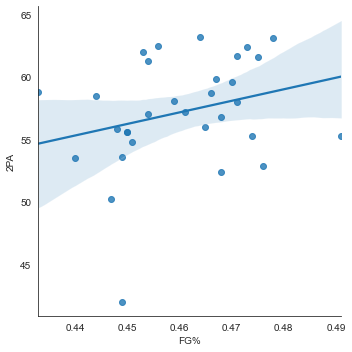

In [74]:
# plot FG% against 2P for 2019 Team Data
fgp_x = team_2019['FG%'].to_numpy().reshape(-1, 1)
tpa_y = team_2019['2PA'].to_numpy()
lin_reg = LinearRegression().fit(fgp_x, tpa_y)
sns.lmplot(x='FG%', y='2PA', data=team_2019)
corr_coeff = pearsonr(team_2019['FG%'].to_numpy(), tpa_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 1.0253695895143273
Correlation Coefficient: 0.6722072417285532


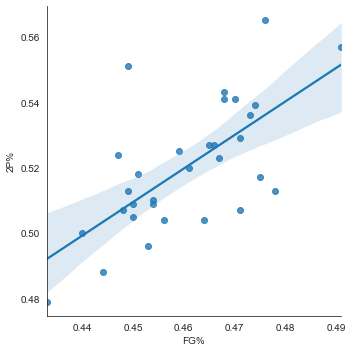

In [75]:
# plot FG% against 2P% for 2019 Team Data
fgp_x = team_2019['FG%'].to_numpy().reshape(-1, 1)
tpp_y = team_2019['2P%'].to_numpy()
lin_reg = LinearRegression().fit(fgp_x, tpp_y)
sns.lmplot(x='FG%', y='2P%', data=team_2019)
corr_coeff = pearsonr(team_2019['FG%'].to_numpy(), tpp_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 1.1213520291837662
Correlation Coefficient: 0.5247338303097445


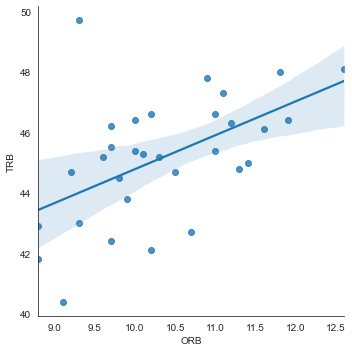

In [76]:
# plot ORB against TRB for 2019 Team Data
orb_x = team_2019['ORB'].to_numpy().reshape(-1, 1)
trb_y = team_2019['TRB'].to_numpy()
lin_reg = LinearRegression().fit(orb_x, trb_y)
sns.lmplot(x='ORB', y='TRB', data=team_2019)
corr_coeff = pearsonr(team_2019['ORB'].to_numpy(), trb_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 1.033604783715708
Correlation Coefficient: 0.8839580474966036


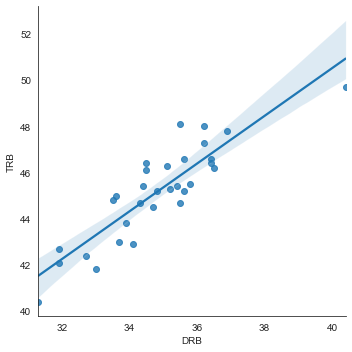

In [77]:
# plot DRB against TRB for 2019 Team Data
drb_x = team_2019['DRB'].to_numpy().reshape(-1, 1)
trb_y = team_2019['TRB'].to_numpy()
lin_reg = LinearRegression().fit(drb_x, trb_y)
sns.lmplot(x='DRB', y='TRB', data=team_2019)
corr_coeff = pearsonr(team_2019['DRB'].to_numpy(), trb_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

Regression Coefficient: 0.12080483356133173
Correlation Coefficient: 0.06610042615114779


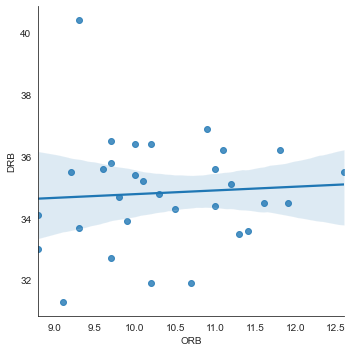

In [78]:
# plot ORB against DRB for 2019 Team Data
orb_x = team_2019['ORB'].to_numpy().reshape(-1, 1)
drb_y = team_2019['DRB'].to_numpy()
lin_reg = LinearRegression().fit(orb_x, drb_y)
sns.lmplot(x='ORB', y='DRB', data=team_2019)
corr_coeff = pearsonr(team_2019['ORB'].to_numpy(), drb_y)
print('Regression Coefficient: ' + str(lin_reg.coef_[0]))
print('Correlation Coefficient: ' + str(corr_coeff[0]))

### Data Cleaning and Aggregation

In [79]:
np_datasets =  {} ##this will be a dictionary of arrays

for key in sorted (datasets.keys()):  
    if 'Team'in key:
        season_data = datasets[key]
        #if key[0:4] in np_datasets:
         #np_datasets[key[0:4]] = pd.merge(np_datasets[key[0:4]], season_data, on = ['Team'])
        #else:
        np_datasets[key[0:4]] = season_data
            
## Adds the year to team name to provide unique identification to each team      
team_data = {}
for key in np_datasets:
        np_datasets[key] = np_datasets[key].drop(['Rk','G'], axis = 1)
        for index in np_datasets[key].index:
            team_key = np_datasets[key].loc[index, 'Team'] + " " + key
            team_data[team_key] = np_datasets[key].loc[index,:]
            
            
#print(team_data['Golden State Warriors* 2019'])
            
## This 2-D array will be fed into the PCA and K-Means 
#team_data_array = []
#for key in team_data:
#    team_data_array.append(team_data[key])

agg_team_data = pd.DataFrame.from_dict(team_data, orient='index')
agg_team_data = agg_team_data.drop(['Team'], axis=1)
agg_team_data

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Milwaukee Bucks* 2019,241.2,43.4,91.1,0.476,13.5,38.2,0.353,29.9,52.9,0.565,...,0.773,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1
Golden State Warriors* 2019,241.5,44.0,89.8,0.491,13.3,34.4,0.385,30.8,55.3,0.557,...,0.801,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7
New Orleans Pelicans 2019,240.9,43.7,92.2,0.473,10.3,29.9,0.344,33.4,62.4,0.536,...,0.761,11.1,36.2,47.3,27.0,7.4,5.4,14.8,21.1,115.4
Philadelphia 76ers* 2019,241.5,41.5,88.2,0.471,10.8,30.2,0.359,30.7,58.0,0.529,...,0.771,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2
Los Angeles Clippers* 2019,241.8,41.3,87.5,0.471,10.0,25.8,0.388,31.3,61.7,0.507,...,0.792,9.7,35.8,45.5,24.0,6.8,4.7,14.5,23.3,115.1
Portland Trail Blazers* 2019,242.1,42.3,90.6,0.467,11.0,30.7,0.359,31.3,59.8,0.523,...,0.814,11.8,36.2,48.0,23.0,6.7,5.0,13.8,20.4,114.7
Oklahoma City Thunder* 2019,242.1,42.6,94.0,0.454,11.4,32.6,0.348,31.3,61.3,0.510,...,0.713,12.6,35.5,48.1,23.4,9.3,5.2,14.0,22.4,114.5
Toronto Raptors* 2019,242.4,42.2,89.1,0.474,12.4,33.8,0.366,29.8,55.3,0.539,...,0.804,9.6,35.6,45.2,25.4,8.3,5.3,14.0,21.0,114.4
Sacramento Kings 2019,240.6,43.2,93.1,0.464,11.3,29.9,0.378,31.9,63.2,0.504,...,0.726,11.0,34.4,45.4,25.4,8.3,4.4,13.4,21.4,114.2
Washington Wizards 2019,243.0,42.1,90.1,0.468,11.3,33.3,0.341,30.8,56.8,0.543,...,0.768,9.7,32.7,42.4,26.3,8.3,4.6,14.1,20.7,114.0


### Sample K-Means Analysis

In [88]:
# isolate necessary features from the Team 2019 dataset
team_2019_features = team_2019.drop(['Rk', 'Team', 'G', 'MP', 'FG', '3PA', 'FT', '2P', '2P%', 'DRB'], axis=1)
team_2019_features.head()

,FGA,FG%,3P,3P%,2PA,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,91.1,0.476,13.5,0.353,52.9,23.2,0.773,9.3,49.7,26.0,7.5,5.9,13.9,19.6,118.1
1,89.8,0.491,13.3,0.385,55.3,20.4,0.801,9.7,46.2,29.4,7.6,6.4,14.3,21.4,117.7
2,92.2,0.473,10.3,0.344,62.4,23.4,0.761,11.1,47.3,27.0,7.4,5.4,14.8,21.1,115.4
3,88.2,0.471,10.8,0.359,58.0,27.5,0.771,10.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2
4,87.5,0.471,10.0,0.388,61.7,28.5,0.792,9.7,45.5,24.0,6.8,4.7,14.5,23.3,115.1


In [89]:
# use standard scaler to adjust data to have 0 mean and 1 standard deviation
team_2019_std = StandardScaler().fit_transform(team_2019_features)

# use PCA to reduce data to two dimensions
pca = PCA(n_components=2)
team_2019_pca = pca.fit_transform(team_2019_std)

In [90]:
# generate sample Kmeans using 2019 Team Data
kmeans = KMeans(n_clusters=5).fit(team_2019_pca)
kmeans_predictions = kmeans.predict(team_2019_pca)

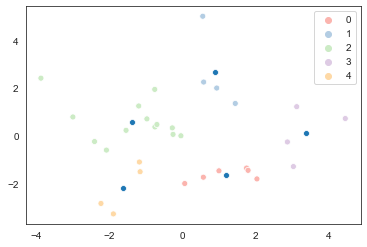

In [91]:
# plot cluster centers
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1])

# plot data color coded based on cluster
sns.scatterplot(x=team_2019_pca[:, 0], y=team_2019_pca[:, 1], hue=kmeans_predictions, palette='Pastel1')

### Scratch Code Work

In [43]:
misc_2010_pand = datasets['2019 Misc']
misc_2010_pand = misc_2010_pand.drop(['Rk','Team','Age', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'W', 'L', 'NRtg'], axis = 1)
team_2010_pand = datasets['2010 Team']
team_2010_pand = team_2010_pand.drop(['Rk', 'Team', 'G'], axis = 1)
team_2010_pand
team_2010 = datasets['2010 Team'].to_numpy()
#misc_2010 = datasets['2010 Misc'].to_numpy()
#oppon_2010 = datasets['2010 Opponent']


Text(0, 0.5, 'PCA 2')

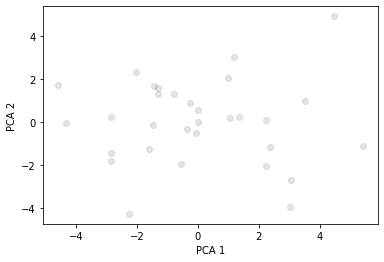

In [39]:
team_2010_std = StandardScaler().fit_transform(team_2010_pand)
pca = PCA(n_components=2)
pc = pca.fit_transform(team_2010_std)
PCA_components = pd.DataFrame(pc)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

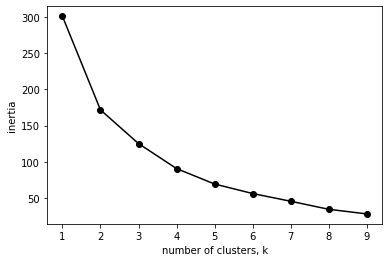

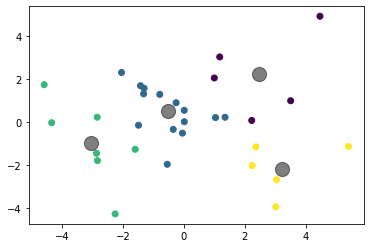

In [40]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

#Plotting graph to find the elbow point for K-means
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
kmeans = KMeans(n_clusters=4)
kmeans.fit(PCA_components)
y_kmeans = kmeans.predict(PCA_components)
plt.scatter(PCA_components.to_numpy()[:,0], PCA_components.to_numpy()[:,1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [42]:
fg_percent = team_2010['FG%'].to_numpy().reshape(-1,1)
threep_percent = team_2010['3P%'].to_numpy().reshape(-1,1)
reg = LinearRegression()
reg.fit(fg_percent, threep_percent)
reg_pred = reg.predict(fg_percent)
plt.scatter(fg_percent, threep_percent)
plt.plot(fg_percent, reg_pred, color='blue', linewidth=3)
plt.show()
sample_plot = sns.regplot(x = 'FG%', y = '3P%', data = team_2010)





NameError: name 'team_2010' is not defined